# Welcome to the Minecraft Group Project!

## <ins>Introduction</ins>
Due to COVID-19 and the strict lockdown policies imposed in many countries, a huge surge of gamers was observed in 2020, with the numbers racing up to 2.7 billion. Given this, many studies have been conducted on how gamers play video games and how video games can affect an individual’s well-being, cognitive performance and brain activity ([Johannes et al., 2021](https://doi.org/10.1098/rsos.202049); [Jordan & Dhamala, 2022](https://doi.org/10.1016/j.ynirp.2022.100112)).

Despite the global increase in the number of gamers and the potential advantages associated with video gaming, numerous studies have been hindered by limited sample sizes ([Alonso-Fernández et al., 2019](https://doi.org/10.1016/j.compedu.2019.103612); [Petri & Gresse, 2017](https://doi.org/10.1016/j.compedu.2017.01.004)) and inaccuracies stemming from reliance on self-reported engagement metrics ([Johannes et al., 2021](https://doi.org/10.1098/rsos.202049)). Addressing these critical issues, a team of computer scientists from the University of British Columbia, known as PLAICraft, has developed a study that automates data collection during players' gaming sessions in Minecraft. This approach alleviates concerns related to self-evaluation. Furthermore, PLAICraft aims to identify specific player types that are likely to generate a greater volume of data based on previous datasets, which will serve as the central focus of this paper. Specifically, this paper will investigate what gender is likely to contribute more data based on the K-NN classification model based on the Age and Total Playtime of the players.

The dataset being used in this study, derived from `players.csv` (courtesy of PLAICraft team; [here](https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz)), contains a total of 196 observations and nine variables. These variables are listed and described in the table below:

<!DOCTYPE html>
<html>
<body>
    <table style="border-collapse: collapse; width: 40%; margin: auto auto; table-layout: auto; border: 0px solid black;">
        <caption style="font-size: 1.1em; font-weight: bold; margin-bottom: 5px; text-align: center;">
            Table 1: The Name of the Variables, Its Data Type and Meaning
        </caption>
        <tr>
            <th style="border: 0px solid black; text-align: center; padding: 10px;">Name</th>
            <th style="border: 0px solid black; text-align: center; padding: 10px;">Data Type</th>
            <th style="border: 0px solid black; text-align: center; padding: 10px;">Meaning</th>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Experience</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Self-evaluated experience with Minecraft</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Subscribe</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">lgl</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Declarations to receive email updates</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Hashed Email</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Encrypted email via Hash</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Played Hours</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">dbl</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Total played hours</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Name</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">A fake name used in-game</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Gender</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Gender of players</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Age</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">dbl</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Age of players</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Individual ID</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">The player's ID in-game</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Organization Name</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">The name of the players’ school/organization</td>
        </tr>
    </table>
</body>
</html>


It is important to note while the data can be used to provide meaningful insights into relevant topics, there are potential issues that exist in this data. This includes (1) missing values for `Individual ID` and `Organization Name` (e.g. reported as NA), (2) potential inaccuracy in the self-reported age (e.g. age 91 and 99) and (3) playtime might not correlate to contribution levels to the study (e.g microphone can also be used)

## <ins>Methods & Results</ins>
*   **Methods & Results**:
    *   describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
    *   your report should include code which:
        *   loads data  
        *   wrangles and cleans the data to the format necessary for the planned analysis
        *   performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
        *   creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
        *   performs the data analysis
        *   creates a visualization of the analysis 
        *   _note: all figures should have a figure number and a legend_

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)

set.seed(2024)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### (1) Load the Data
After examining that the data is of .csv files with the delimiter as a common (i.e. ","), we read in the data using the `read_csv()` as provided by `tidyverse` package using the URL given by the PLAICraft team.

In [2]:
# Constants
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"

# Reading in the data via URL
mc_players <- read_csv(url_players)
head(mc_players, 10)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


### (3) Data Wrangling
Upon the initial examination, it is clear that the columns/variables `individualID` and `organizationName` provide no information as all values are `NA` values. Similarly, the `experience`, `subscribe`, `hashedEmail` and `name` were also removed using the `select()` function as these variables have no values in the question of this paper.

In [3]:
# Remove unnecessary columns
mc_cleaned <- mc_players |>
    select(played_hours, age, gender) |>
    arrange(age)
head(mc_cleaned, 5) # shorten for easier preview

# Categorize the age group
mc_grouped <- mc_cleaned |>
    mutate(age_group = case_when(age >= 5 & age <= 12 ~ "Child",
                                 age >= 13 & age <= 19 ~ "Teen",
                                 age >= 20 & age <= 39 ~ "Adult",
                                 age >= 40 & age <= 59 ~ "Middle Age Adult",
                                 age >= 60 ~ "Senior Adult",
                                 TRUE ~ "Unknown")) |>
    mutate(age_group = factor(age_group, levels = c("Child", "Teen", "Adult", "Middle Age Adult", "Senior Adult")))
head(mc_grouped, 5) # just to shorten the preview of the data

played_hours,age,gender
<dbl>,<dbl>,<chr>
0.3,8,Male
30.3,9,Male
3.6,10,Male
2.9,11,Male
0.5,12,Male


played_hours,age,gender,age_group
<dbl>,<dbl>,<chr>,<fct>
0.3,8,Male,Child
30.3,9,Male,Child
3.6,10,Male,Child
2.9,11,Male,Child
0.5,12,Male,Child


[1] 20

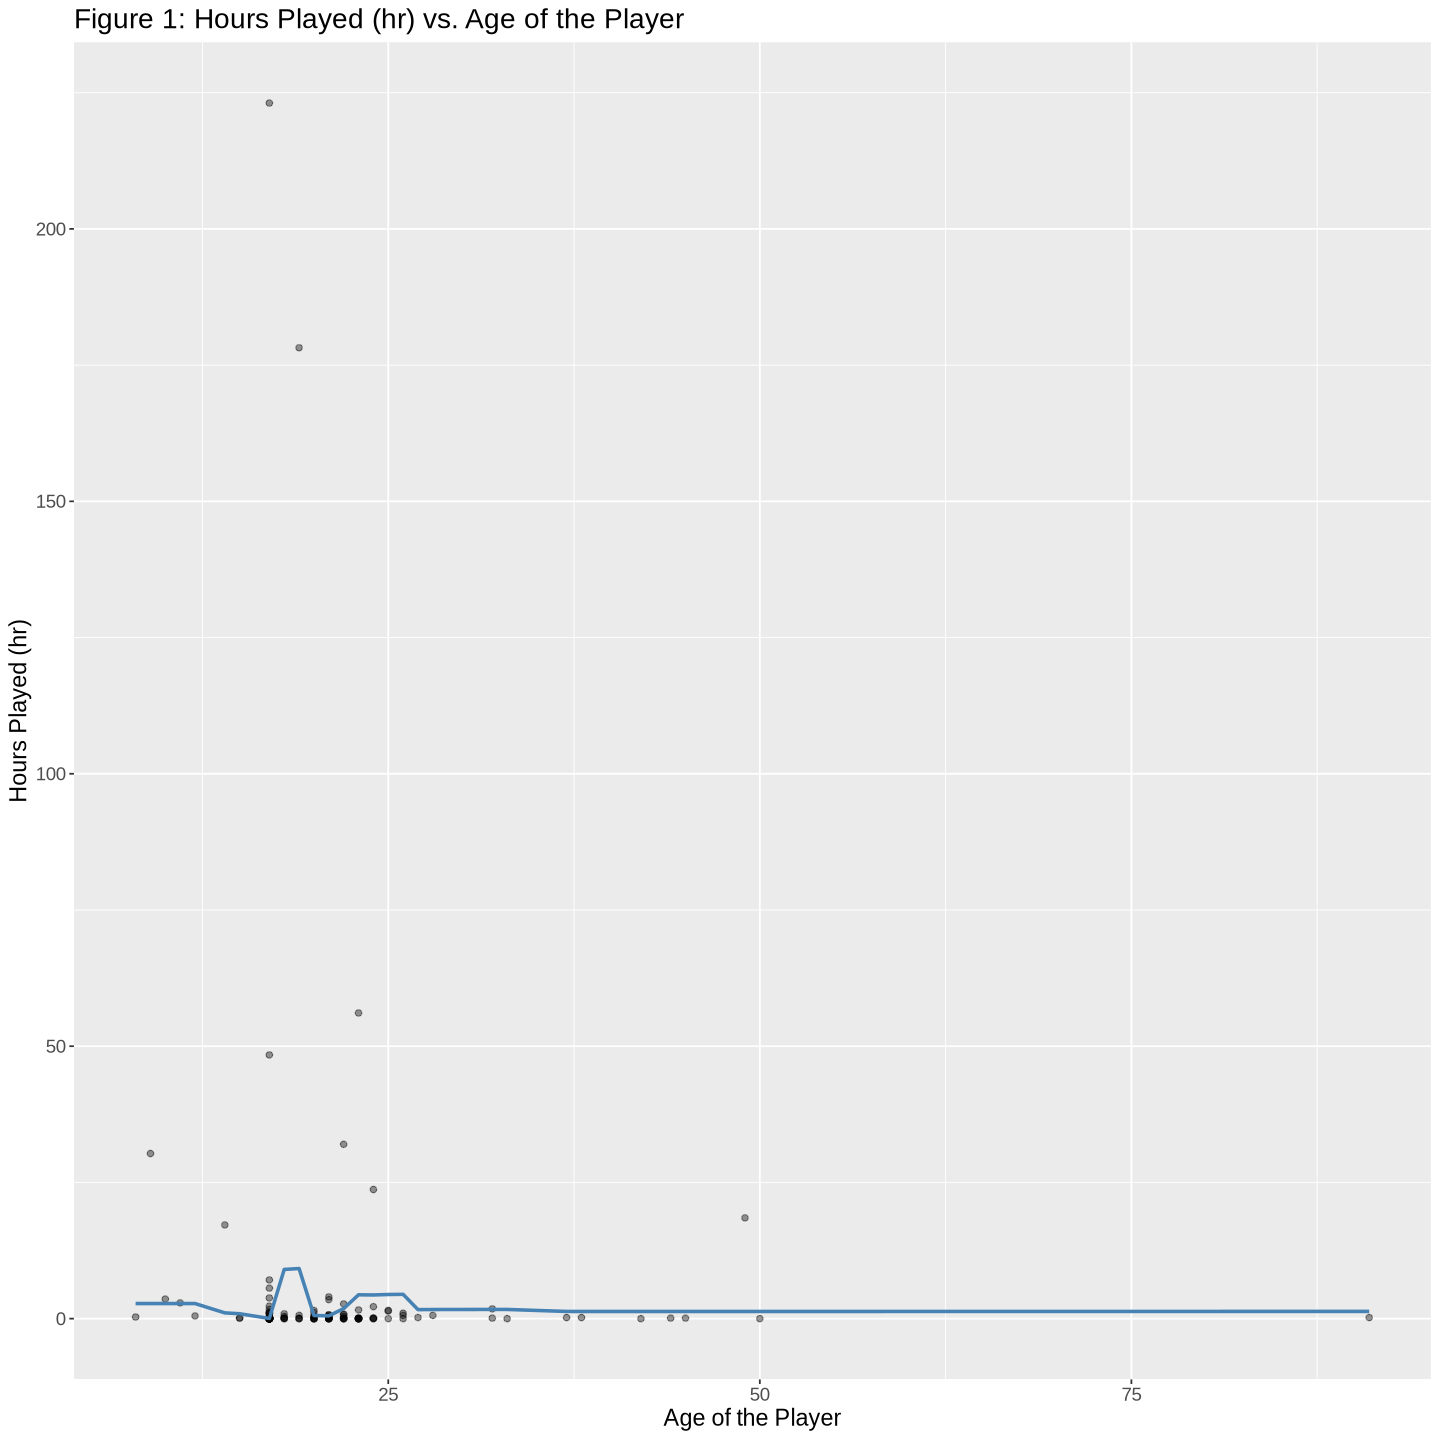

In [9]:
options(repr.plot.width = 12, repr.plot.height = 12)
set.seed(1)

mc_split <- initial_split(mc_cleaned, prop = 0.75, strata = played_hours)
mc_train <- training(mc_split)
mc_test <- testing(mc_split)

mc_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression") 

mc_recipe <- recipe(played_hours ~ age, data = mc_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

mc_vfold <- vfold_cv(mc_train, v = 10, strata = played_hours)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1)) 

mc_wkflw <- workflow() |>
    add_model(mc_spec) |>
    add_recipe(mc_recipe) 

mc_results <- mc_wkflw |>
  tune_grid(resamples = mc_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# show only the row of minimum RMSPE
mc_min <- mc_results |>
    filter(mean == min(mean)) |>
    pull(neighbors)
mc_min

mc_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = mc_min) |>
    set_engine("kknn") |>
    set_mode("regression") 

mc_fit <- workflow() |>
    add_recipe(mc_recipe) |>
    add_model(mc_spec_2) |>
    fit(data = mc_train) 

mc_preds <- mc_fit |>
  predict(mc_train) |>
  bind_cols(mc_train)
    

mc_plot_final <- ggplot(mc_preds, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    geom_line(data = mc_preds,
              mapping = aes(x = age, y = .pred),
              color = "steelblue",
              linewidth = 1) +
    labs(x = "Age of the Player",
         y = "Hours Played (hr)",
        title = "Figure 1: Hours Played (hr) vs. Age of the Player") +
    theme(text = element_text(size = 14))
mc_plot_final

→ A | warning: ✖ No observations were detected in `truth` for levels: Other and Two-Spirited.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | error:   Failed to compute `roc_auc()`.
               Caused by error in `group[estimate]`:
               ! Can't subset columns that don't exist.
               ✖ Column `.pred_Other` doesn't exist.

There were issues with some computations   A: x1
→ C | warning: ✖ No observations were detected in `truth` for levels: Agender, Other, and
                 Prefer not to say.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1   C: x1

→ D | warning: ✖ No observations were detected in `truth` for levels: Agender and Other.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1   B: x1   C:

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,accuracy,multiclass,0.5508899,4,0.024397260,Preprocessor1_Model10
9,accuracy,multiclass,0.5422692,4,0.008379599,Preprocessor1_Model09
7,accuracy,multiclass,0.5353170,4,0.029061065,Preprocessor1_Model07
8,accuracy,multiclass,0.5353170,4,0.029061065,Preprocessor1_Model08
5,accuracy,multiclass,0.4927697,4,0.028231856,Preprocessor1_Model05
6,accuracy,multiclass,0.4927697,4,0.024471635,Preprocessor1_Model06
4,accuracy,multiclass,0.4835929,4,0.031183352,Preprocessor1_Model04
3,accuracy,multiclass,0.4076752,4,0.034189973,Preprocessor1_Model03
2,accuracy,multiclass,0.3812570,4,0.028222267,Preprocessor1_Model02


[1] 10

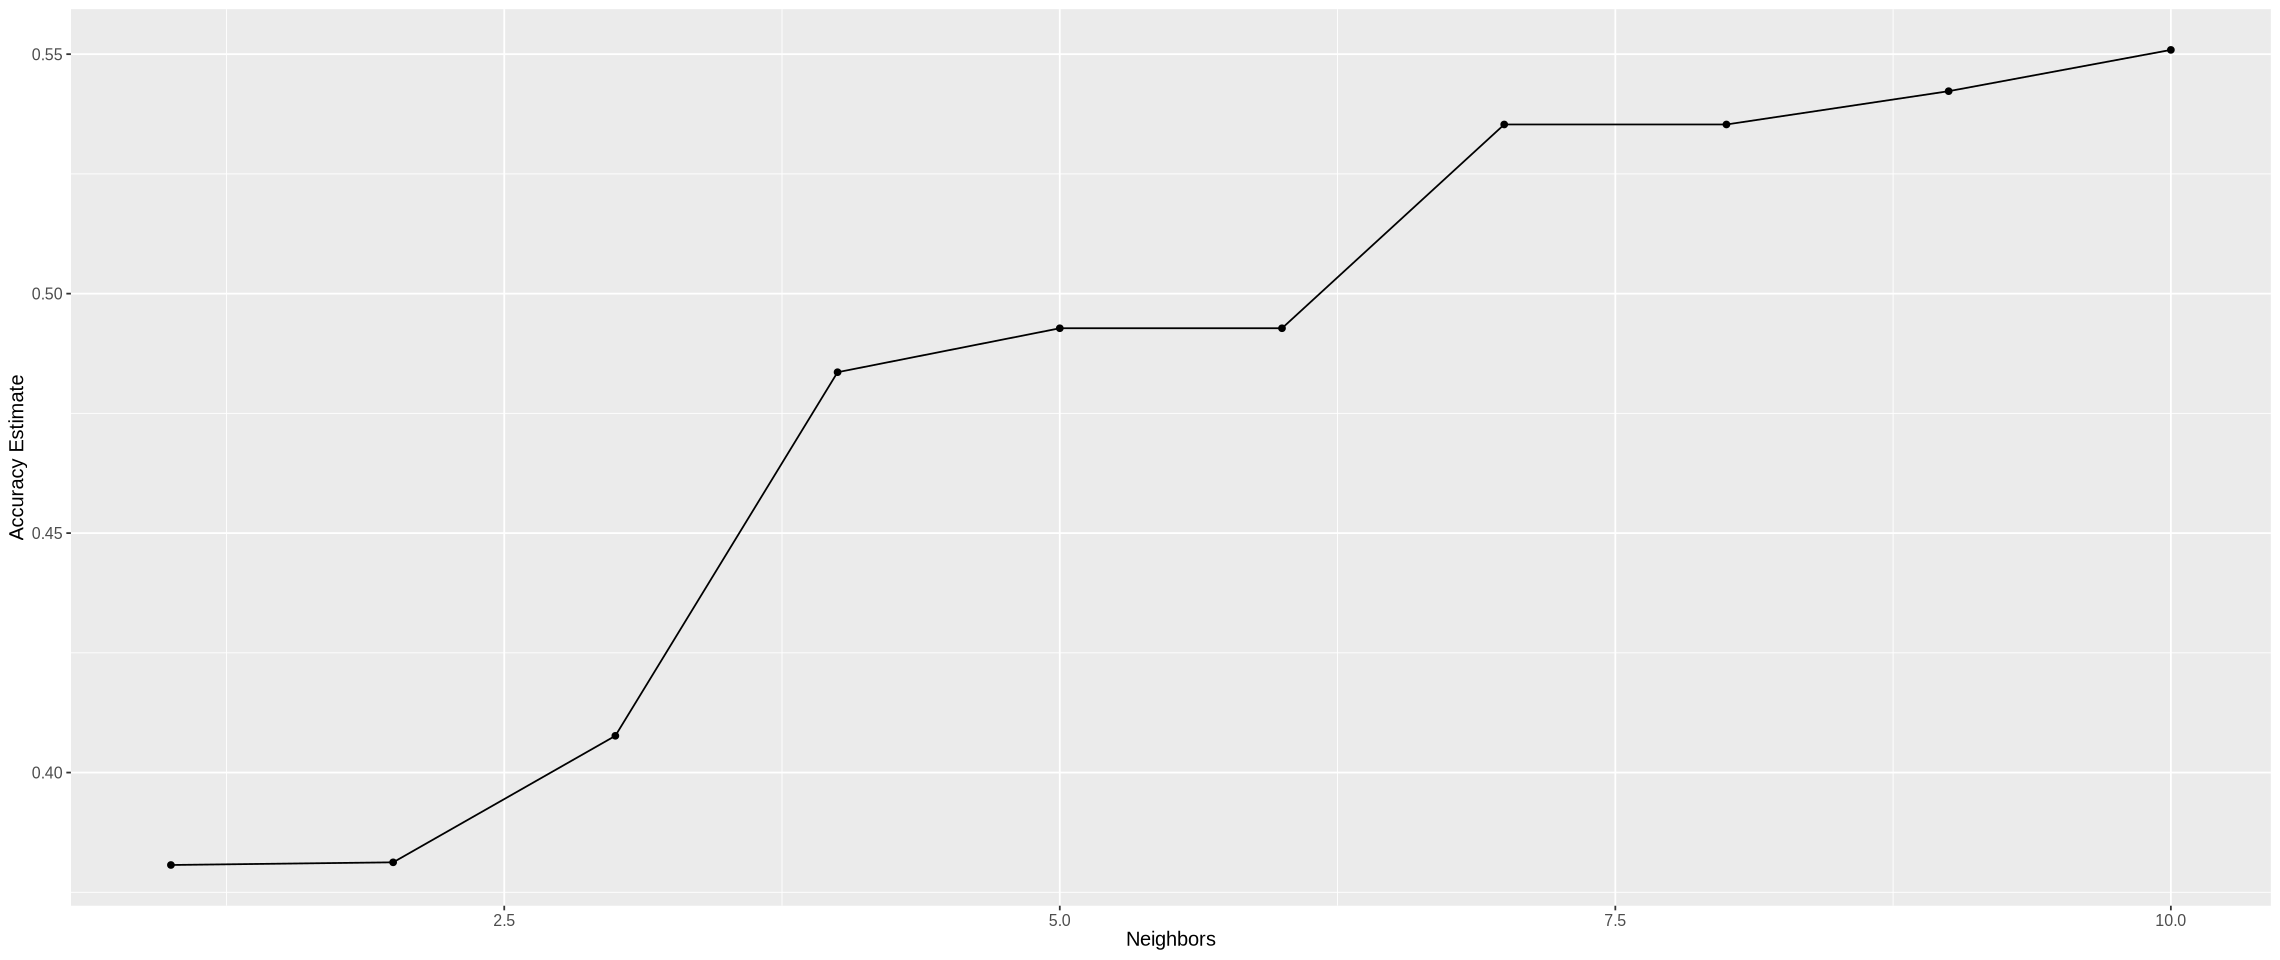

In [36]:
# Delete later! Only setting seed to ensure consistent results
set.seed(8947656)

players <- mc_players |>
    select(hashedEmail, name, age, played_hours, gender) |>
    arrange(age)

players_split <- initial_split(players, prop = 0.75, strata = gender)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(gender ~ age + played_hours, data = players_train) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")


players_vfold <- vfold_cv(players_train, v = 5, strata = gender)
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))
# Justify why 1-30 is a good range to test (5 folds, 196 observations, 4/5 chunks of 196 observations is training set data (refer to Figure 6.4 in Ch. 6 of textbook),
# meaning a total of 156 data points per training iteration

accuracies <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples =  players_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

# TEMPORARY, DELETE LATER
temp_accuracies <- arrange(accuracies, desc(mean))
temp_accuracies

players_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
# List of ideal k values given a seed (simply used for experimental purposes to see if this algorithm is reasonable, i.e. the ideal k is relatively consistent across seeds)
# players_k = 27 when set.seed(1)
# players_k = 26 when set.seed(765)
# players_k = 17 when set.seed(82)   --- ANOMALY
# players_k = 25 when set.seed(8746)
# players_k = 24 when set.seed(9)
# players_k = 19 when set.seed(95832)  --- ANOMALY?
# players_k = 25 when set.seed(928945)
# players_k = 14 when set.seed(8947656)  --- ANOMALY
# CONCLUSION: Ultimately, the ideal k values produces very similar accuracies, so just a change in seed could cause a large shift in the ideal k value
#             The peak accuracy is about 64.4% everytime, so K values of 25 +/- 2 are pretty reasonable... but the anomalies listed above are a bit weird- they also have a peak accuracy
#             of abotu 64.4%, but the K value is drastically different... I guess this shouldn't change how we proceed anyways- just use players_k in model spec to predict
players_k
    
# Warnings? I think what's happening is that there aren't enough data points for Non-binary, Agender, Two-Spirited, Other, and/or Prefer not to say (depends on seed), 
# so when the cross-validation is performed, not all the folds have all of the genders

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
# I don't know why the graph flattens out at the top though... is that the number of data points? Why does the number of data points differ for every seed? Should probably address in analysis

accuracy_vs_k

### (4) Some Calculations (and Visualization)

`summarise()` has grouped output by 'age_group'. You can override using the
`.groups` argument.


age_group,gender,count
<fct>,<chr>,<int>
Child,Male,5
Teen,Female,18
Teen,Male,61
Teen,Non-binary,9
Teen,Prefer not to say,5


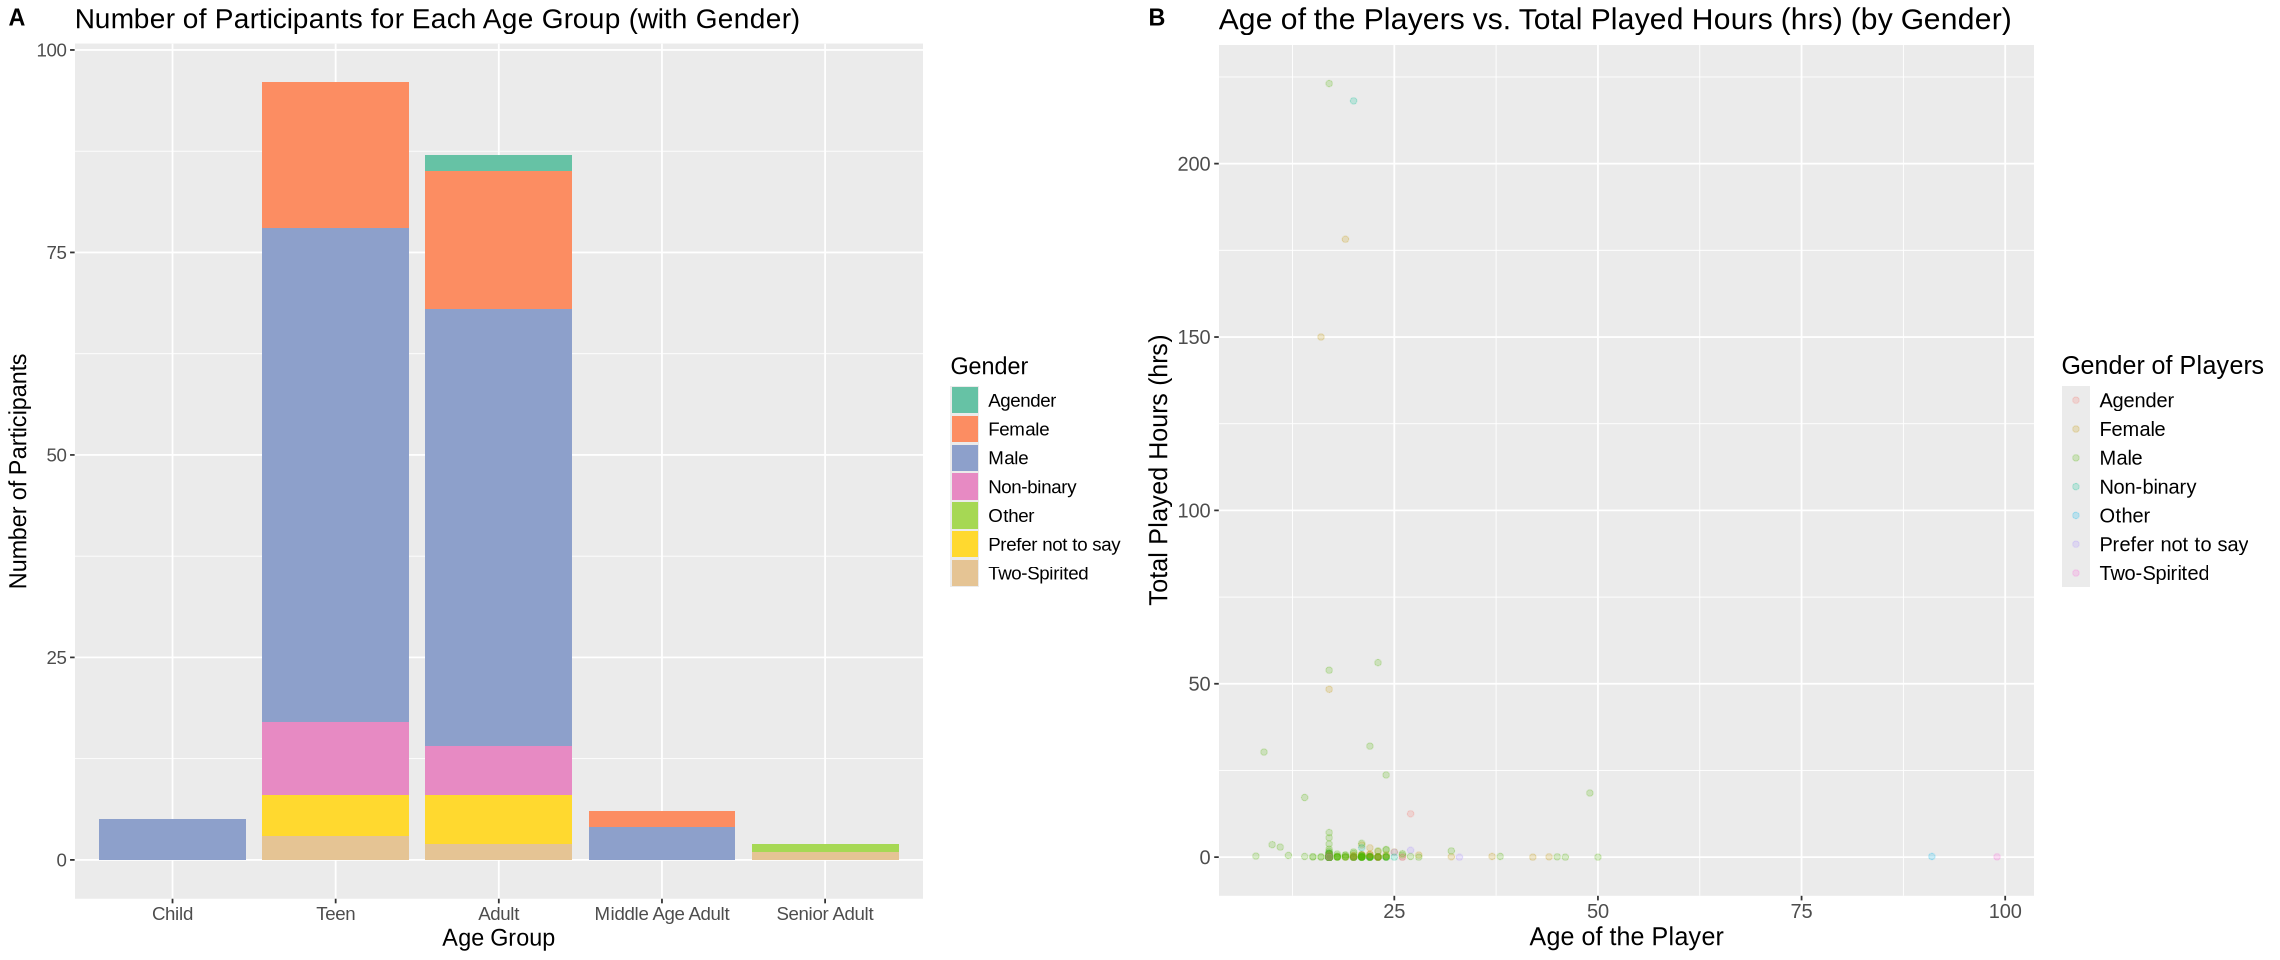

In [5]:
options(repr.plot.width = 19, repr.plot.height = 8)

# Number of observations for Each Age Group
mc_counted <- mc_grouped |>
    group_by(age_group, gender) |>
    summarize(count = n())
head(mc_counted, 5) # this is just to shorten the preview data

# !!! NOTE: Stack is used to show the number of participants, BUT also the proportion of gender in each Age Group
count_plot <- mc_counted |>
    ggplot(aes(x = age_group, y = count, fill = gender)) +
    geom_bar(stat = "identity",
            position = "stack") +
    labs(x = "Age Group",
         y = "Number of Participants",
        fill = "Gender",
        title = "Number of Participants for Each Age Group (with Gender)") +
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 14))

grouped_plot <- mc_grouped |>
    ggplot(aes(x = age, y = played_hours, color = gender)) +
    geom_point(alpha = 0.2) +
    labs(x = "Age of the Player",
         y = "Total Played Hours (hrs)",
         color = "Gender of Players",
        title = "Age of the Players vs. Total Played Hours (hrs) (by Gender)") +
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 15))

plot_grid(count_plot, grouped_plot, labels = "AUTO")